a) First I'll analytically find the density of states. I'll treat the parameter space as a 4D "volume". Surfaces of constant energy will be ellipsoids.


\begin{equation}
\frac{p_x^2 + p_y^2}{2m} + \frac{1}{2} m \omega^2 (x^2 + y^2) \leq E.
\end{equation}

A general 4D hyper-ellipsoid of the form

\begin{equation}
\frac{x_1^2}{a_1^2} + \frac{x_2^2}{a_2^2} + \frac{x_3^2}{a_3^2} + \frac{x_4^2}{a_4^2} \leq 1
\end{equation}

has a volume

\begin{equation}
V_4 = \frac{\pi^2}{2} a_1 a_2 a_3 a_4.
\end{equation}

For our system, the energy condition can be rewritten as:

\begin{equation}
\frac{x^2 + y^2}{(E/m\omega^2)} + \frac{p_x^2 + p_y^2}{(2mE)} \leq 1.
\end{equation}

Applying the volume formula:

\begin{equation}
\Omega(E) = \frac{\pi^2}{2} \cdot \left(\frac{E}{m\omega^2}\right) \cdot \left(\frac{E}{m\omega^2}\right) \cdot \left(2mE\right) \cdot \left(2mE\right).
\end{equation}


\begin{equation}
= 2\pi^2 \frac{E^2}{\omega^4}.
\end{equation}


The density of states is given by:

\begin{equation}
g(E) = \frac{d\Omega}{dE}.
\end{equation}

Differentiating,

\begin{equation}
g(E) = \frac{d}{dE} \left( 2\pi^2 \frac{E^2}{\omega^4} \right).
\end{equation}

\begin{equation}
= 4\pi^2 \frac{E}{\omega^4}.
\end{equation}


Now we calculate this expression: 

\begin{equation}
Z(\beta) = \int_{0}^{\infty} g(E) e^{-\beta E} \,dE 
\end{equation}

Doing some simple integration by parts gives:

\begin{equation}
Z(\beta) = 4 \pi^2 / \beta^2 \omega^4 
\end{equation}


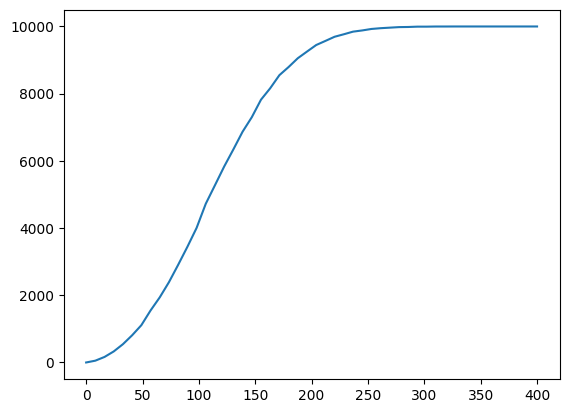

In [1]:
#now calculating DOS numerically. I'll make a 4D array of values, then count how many are below energy E. I won't worry about all the constants for this, I"ll just confirm DOS goes linearly with E
import matplotlib.pyplot as plt
import numpy as np

N =10

x , y, px, py = np.arange(N), np.arange(N), np.arange(N), np.arange(N)

Ematrix = np.zeros((N,N,N,N))

for i in range(N):
    for j in range(N):
        for k in range(N):
            for l in range(N):
                Ematrix[i][j][k][l] = px[i]**2 + py[j]**2 + x[k]**2 + y[l]**2


Evals = np.linspace(0,400, num =50)
state_V = []

for E in Evals:
    sV = (Ematrix < E).sum()
    state_V.append(sV)


plt.plot(Evals, state_V)

It is indeed linear, if we ignore artifacts from not enough voxels near the origin, and extending past the boundary at higher E values.

(array([ 30.,  65.,  85., 117., 140., 202., 203., 225., 262., 310., 342.,
        356., 444., 395., 465., 440., 424., 472., 462., 445., 416., 431.,
        399., 348., 331., 308., 244., 271., 242., 177., 166., 142., 115.,
         81., 101.,  76.,  60.,  46.,  33.,  31.,  25.,  21.,  20.,  17.,
          5.,   4.,   2.,   2.,   0.,   2.]),
 array([  1.07134546,   4.61374013,   8.15613481,  11.69852948,
         15.24092415,  18.78331882,  22.32571349,  25.86810817,
         29.41050284,  32.95289751,  36.49529218,  40.03768686,
         43.58008153,  47.1224762 ,  50.66487087,  54.20726554,
         57.74966022,  61.29205489,  64.83444956,  68.37684423,
         71.9192389 ,  75.46163358,  79.00402825,  82.54642292,
         86.08881759,  89.63121227,  93.17360694,  96.71600161,
        100.25839628, 103.80079095, 107.34318563, 110.8855803 ,
        114.42797497, 117.97036964, 121.51276431, 125.05515899,
        128.59755366, 132.13994833, 135.682343  , 139.22473768,
        142.767132

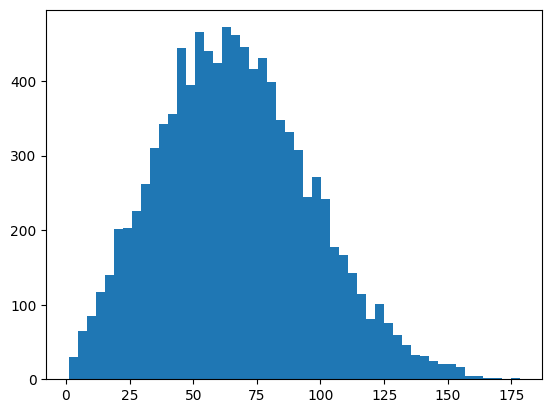

In [2]:
#c)

#I'm going to try something new, to numerically find the density of states I'll literally just pick random values


def Hamiltonian(px, py, x, y, lambd, m, omega):
    return (px**2 + py**2)/(2*m) +(m*omega**2 / 2)*(x**2 + y**2) + lambd*(x**2 + y**2)**2


Elist = []
for i in range(10000):
    px = np.random.rand()*10     #number randomly distributed between 0 and 10
    py = np.random.rand()*10
    x = np.random.rand()*10
    y = np.random.rand()*10

    Elist.append(Hamiltonian(px, py, x, y, 0.0, 1, 1))       #setting lambda to 0 to confirm linear behavior for part a)


plt.hist(Elist, bins=50)



(array([ 21.,  37.,  50.,  67.,  74.,  71.,  81., 106., 106., 101., 105.,
        115., 107., 110., 141., 133., 145., 155., 143., 145., 164., 163.,
        173., 178.]),
 array([ 0.        ,  2.08333333,  4.16666667,  6.25      ,  8.33333333,
        10.41666667, 12.5       , 14.58333333, 16.66666667, 18.75      ,
        20.83333333, 22.91666667, 25.        , 27.08333333, 29.16666667,
        31.25      , 33.33333333, 35.41666667, 37.5       , 39.58333333,
        41.66666667, 43.75      , 45.83333333, 47.91666667, 50.        ]),
 <BarContainer object of 24 artists>)

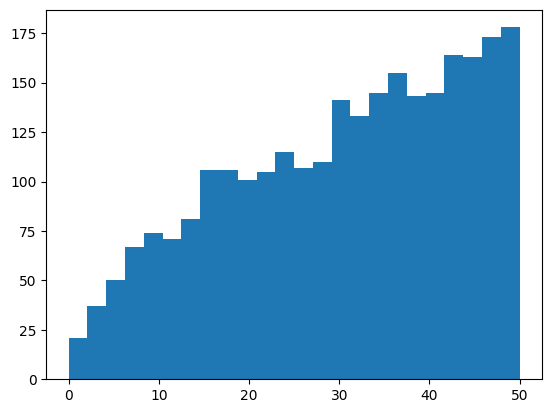

In [3]:
Elist = []
for i in range(100000):
    px = np.random.rand()*10     #number randomly distributed between 0 and 10
    py = np.random.rand()*10
    x = np.random.rand()*10
    y = np.random.rand()*10

    Elist.append(Hamiltonian(px, py, x, y, 1, 1, 1))       

binsss = np.linspace(0,50,25)

plt.hist(Elist, bins=binsss)

The density of states is now a decreasing function. Important to keep in mind that only small values for E can be trusted, because at high values of E there might be values of px, py, x and y, that do get those energies that fall outside the ranges of values we used.

In this case, the cutoff where we for sure accounted for everything is H(px = 10, py=0, x=0, y=0) = 50. The histogram still looks fairly linear, but I can see it level off as the lambda terms start to matter for larger x and y.

I derived this Lagrangian for the double pendulum.

\begin{equation}
L = \frac{1}{2} m L^2 \left( \dot{\theta}_1^2 + \dot{\theta}_2^2 + 2 \dot{\theta}_1 \dot{\theta}_2 \cos(\theta_1 - \theta_2) \right) + mgL \left( \cos\theta_1 + \cos\theta_2 \right).
\end{equation}



Then applying the Lagrangian equations I get:

\begin{equation}
\begin{bmatrix}
1 & \cos(\theta_1 - \theta_2) \\
\cos(\theta_1 - \theta_2) & 1
\end{bmatrix}
\begin{bmatrix}
\ddot{\theta}_1 \\
\ddot{\theta}_2
\end{bmatrix}
+
mL^2
\begin{bmatrix}
0 & -\sin(\theta_1 - \theta_2) \dot{\theta}_2 \\
\sin(\theta_1 - \theta_2) \dot{\theta}_1 & 0
\end{bmatrix}
\begin{bmatrix}
\dot{\theta}_1 \\
\dot{\theta}_2
\end{bmatrix}
+
mgL
\begin{bmatrix}
\sin\theta_1 \\
\sin\theta_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}.
\end{equation}

b) I also did some work to Legendre transform and get the following Hamiltonian:

\begin{equation}
H =
\frac{1}{2mL^2 \sin^2(\theta_1 - \theta_2)}
\begin{bmatrix}
p_1 & p_2
\end{bmatrix}
\begin{bmatrix}
1 & -\cos(\theta_1 - \theta_2) \\
-\cos(\theta_1 - \theta_2) & 1
\end{bmatrix}
\begin{bmatrix}
p_1 \\
p_2
\end{bmatrix}
- mgL (\cos\theta_1 + \cos\theta_2).
\end{equation}

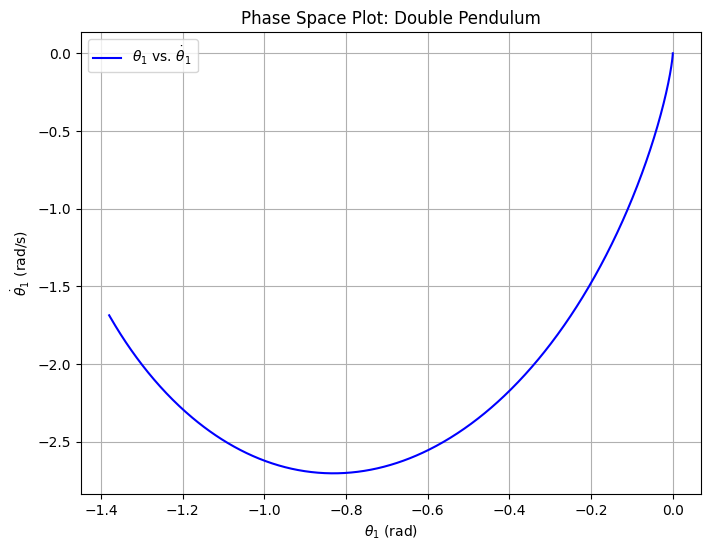

In [4]:
#c) I'm going to use the matrix equation for the Lagrangian to plot the dynamics over time:

# Constants
m = 1.0      # Mass (kg)
L = 1.0      # Length (m)
g = 9.81     # Gravitational acceleration (m/s^2)
dt = 0.001    # Time step (s)
steps = 1000  # Number of time steps

# Initial conditions: [theta1, theta1dot, theta2, theta2dot]
state = np.array([0, 0, np.pi / 2, 0])  # [theta1, theta1dot, theta2, theta2dot]

# Storage for plotting
theta1_vals = []
theta1dot_vals = []

# Time evolution loop
for _ in range(steps):
    theta1, theta1dot, theta2, theta2dot = state
    
    # Mass matrix M(theta)
    M = m * L**2 * np.array([
        [1, np.cos(theta1 - theta2)],
        [np.cos(theta1 - theta2), 1]
    ])
    
    # Gravity term G(theta)
    G = m * g * L * np.array([
        np.sin(theta1),
        np.sin(theta2)
    ])
    
    # Coriolis/Nonlinear term C(theta, theta_dot)
    C = m * L**2 * np.array([
        [0, -np.sin(theta1 - theta2) * theta2dot],
        [np.sin(theta1 - theta2) * theta1dot, 0]
    ])
    
    try:
        # Compute angular accelerations: M * [theta1ddot, theta2ddot] = -C * [theta1dot, theta2dot] - G
        rhs = -C @ np.array([theta1dot, theta2dot]) - G
        theta_ddots = np.linalg.solve(M, rhs)
    
    except:
        print('oops, noninvertible') 
        #do nothing, keep changing thetaddots the same way
    
    # Euler integration step
    state[1] += theta_ddots[0] * dt  # Update theta1dot
    state[3] += theta_ddots[1] * dt  # Update theta2dot
    state[0] += state[1] * dt        # Update theta1
    state[2] += state[3] * dt        # Update theta2

    # Store for plotting
    theta1_vals.append(state[0])
    theta1dot_vals.append(state[1])

# Plot theta1 vs theta1dot
plt.figure(figsize=(8, 6))
plt.plot(theta1_vals, theta1dot_vals, label=r'$\theta_1$ vs. $\dot{\theta}_1$', color='b')
plt.xlabel(r'$\theta_1$ (rad)')
plt.ylabel(r'$\dot{\theta}_1$ (rad/s)')
plt.title('Phase Space Plot: Double Pendulum')
plt.legend()
plt.grid()
plt.show()


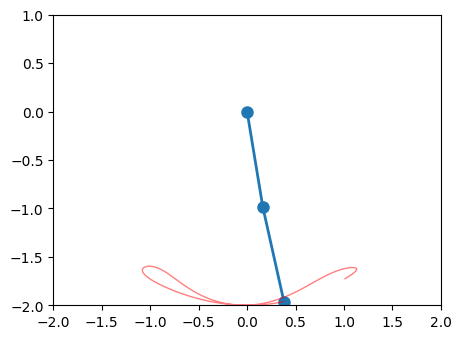

In [11]:

import matplotlib.animation as animation

# Constants
m = 1.0      # Mass (kg)
L = 1.0      # Length (m)
g = 9.81     # Gravitational acceleration (m/s^2)
dt = 0.01    # Time step (s)
steps = 300  # Number of time steps

# Initial conditions: [theta1, theta1dot, theta2, theta2dot]
state = np.array([np.pi / 6, 1, np.pi/6, 0.3])  # [theta1, theta1dot, theta2, theta2dot]

# Storage for plotting
theta1_vals = []
theta2_vals = []

# Function to compute derivatives
def derivatives(state):
    theta1, theta1dot, theta2, theta2dot = state

    # Mass matrix M(theta)
    M = m * L**2 * np.array([
        [2, np.cos(theta1 - theta2)],          #will helped me realize there's supposed to be a 2 here
        [np.cos(theta1 - theta2), 1]
    ])
    
    # Gravity term G(theta)
    G = m * g * L * np.array([
        np.sin(theta1),
        np.sin(theta2)
    ])
    
    # Coriolis term C(theta, theta_dot)
    C = m * L**2 * np.array([
        [0, -np.sin(theta1 - theta2) * theta2dot],
        [np.sin(theta1 - theta2) * theta1dot, 0]
    ])
    
    # Solve for angular accelerations: M * theta_ddot = -C * theta_dot - G
    rhs = -C @ np.array([theta1dot, theta2dot]) - G
    theta_ddots = np.linalg.solve(M, rhs)
    
    return np.array([theta1dot, theta_ddots[0], theta2dot, theta_ddots[1]])

# Runge-Kutta 4th order method
def rk4_step(state, dt):
    k1 = dt * derivatives(state)
    k2 = dt * derivatives(state + 0.5 * k1)
    k3 = dt * derivatives(state + 0.5 * k2)
    k4 = dt * derivatives(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

# Simulate the system
for _ in range(steps):
    state = rk4_step(state, dt)
    theta1_vals.append(state[0])
    theta2_vals.append(state[2])

# Convert to Cartesian coordinates
x1_vals = L * np.sin(theta1_vals)
y1_vals = -L * np.cos(theta1_vals)
x2_vals = x1_vals + L * np.sin(theta2_vals)
y2_vals = y1_vals - L * np.cos(theta2_vals)

# Set up the figure and animation
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-2 * L, 2 * L)
ax.set_ylim(-2 * L, 1)
ax.set_aspect('equal')

line, = ax.plot([], [], 'o-', lw=2, markersize=8)
trace, = ax.plot([], [], 'r-', lw=1, alpha=0.5)  # Trace of second mass
trace_x, trace_y = [], []

# Animation function
def update(frame):
    x1, y1, x2, y2 = x1_vals[frame], y1_vals[frame], x2_vals[frame], y2_vals[frame]
    
    line.set_data([0, x1, x2], [0, y1, y2])  # Update pendulum position
    trace_x.append(x2)
    trace_y.append(y2)
    trace.set_data(trace_x, trace_y)  # Update trace

    return line, trace

# Create animation
ani = animation.FuncAnimation(fig, update, frames=steps, interval=dt * 1000, blit=True)
ani.save('double_pendulum_motion.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
